In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'
import ROOT, uproot


plt.rcParams["figure.figsize"] = (10, 8)


Welcome to JupyROOT 6.27/01


In [64]:
z_upstream=3500
z_downstream=162+z_upstream
det_height=60
det_width=60

x_offset=-.025*z_upstream*0

In [68]:
def plots3d(input_file, title, output_file, MIP=0.000470, event=0,scale_canvas=0.8):
    from mpl_toolkits.mplot3d import Axes3D
    fig=plt.figure(figsize=(8*scale_canvas, 16*scale_canvas))
    ax1 = fig.add_subplot(211, projection='3d',azim=-120, elev=30)
    

    arg=dict(color='k')
    thick=1.5
    thin=0.7

    for z,lw in (z_downstream,thin), (z_upstream, thick):
        
        plt.plot([z]*5, (-det_width/2+x_offset, det_width/2+x_offset, det_width/2+x_offset, -det_width/2+x_offset, -det_width/2+x_offset),
                     (-det_height/2, -det_height/2, det_height/2, det_width/2, -det_width/2), **arg, lw=lw)
    #edges along corners
    for xy in (-det_width/2+x_offset, -det_height/2),(-det_width/2+x_offset, det_height/2),\
                (det_width/2+x_offset, -det_height/2),(det_width/2+x_offset, det_height/2):
        xi=xy[0]
        yi=xy[1]
        lw=thick if (yi>10) or (xi>20) else thin
        plt.plot([z_upstream, z_downstream], (xi, xi), (yi, yi), **arg, lw=lw)


    #now show the hits:
    import uproot as ur

    my_cmap = plt.get_cmap('viridis')
    events = ur.open(f'{input_file}:events')
    arrays_sim = events.arrays()
    print(arrays_sim['MCParticles.PDG'])


    E=arrays_sim['ZDCHits.energy'][event,:]
    x=arrays_sim['ZDCHits.position.x'][event,:]
    y=arrays_sim['ZDCHits.position.y'][event,:]
    z=arrays_sim['ZDCHits.position.z'][event,:]

    slc=E/MIP>0.1
    sctt3d = ax1.scatter3D(z[slc]/10, x[slc]/10, y[slc]/10,
                    alpha = 0.8,
                    c = E[slc]/MIP,
                    s=40*E[slc]/np.max(E),
                    cmap = my_cmap,
                    norm=mpl.colors.LogNorm(vmin=0.5, vmax=70),
                    marker ='H')
    plt.xlim(3490,3670) #z
    plt.ylim(-35+x_offset, 35+x_offset) #x
    plt.gca().set_zlim(-35, 35) #y
    
    
    
#     plt.xlim(-325,-295) #z
#     plt.ylim(-10, 20) #x
#     plt.gca().set_zlim(-15, 15) #y

    plt.gca().set_xlabel("\nz [cm]")
    plt.gca().set_ylabel("\nx [cm]")
    plt.gca().set_zlabel("y [cm]")
    #plt.gca().axis('off')
    plt.title(title)
    
    #plt.savefig(output_file)
    
    #plt.gca().set_anchor("SW")
    #plt.gca().set_box_aspect((18,42,32), zoom=1.2)
    plt.gca().set_box_aspect((180,70,70), zoom=1.2)
    
    
    #xz view
    ax2 = fig.add_subplot(413)
    sctt = ax2.scatter(x[slc]/10, z[slc]/10,
                    alpha = 0.8,
                    c = E[slc]/MIP,
                    s=40*E[slc]/np.max(E),
                    cmap = my_cmap,
                    norm=mpl.colors.LogNorm(vmin=0.5, vmax=70),
                    marker ='H')
    plt.gca().set_xlabel("x [cm]")
    plt.gca().set_ylabel("z [cm]")
    plt.gca().invert_xaxis()
    
    
#     for z,lw in (z_downstream,thick), (z_upstream, thick):
        
#         for shape in rect1, hole:
#             plt.plot(shape.exterior.xy[0],[z]*len(shape.exterior.xy[0]), **arg, lw=lw)
    #edges along corners
    for xy in (-det_width/2+x_offset, -det_height/2),(-det_width/2+x_offset, det_height/2),\
                (det_width/2+x_offset, -det_height/2),(det_width/2+x_offset, det_height/2):
        xi=xy[0]
        yi=xy[1]
        lw=thick if abs(xi)>12 else thin
        plt.plot((xi, xi), [z_upstream, z_downstream], **arg, lw=lw)
    for z in z_upstream, z_downstream:
        plt.plot((-det_width/2+x_offset, det_width/2+x_offset), [z,z], **arg, lw=thick)
    
    xlim, ylim=(-45+x_offset, 45+x_offset),(3480, 3680)
    plt.ylim(*ylim)
    plt.xlim(*xlim)
    
    #set aspect ratio to 1
    ratio = 1.0
#     x_left, x_right = ax.get_xlim()
#     y_low, y_high = ax.get_ylim()
#     a=abs((x_right-x_left)/(y_low-y_high))*ratio
#     print(a)
    ax2.set_aspect(1)
    
#     plt.gca().add_patch(mpl.patches.Rectangle((-R1-clearance, z_downstream), R1+2*clearance+X2+R2, z_upstream-z_downstream,
#                                              color='0.7', zorder=-10, alpha=0.3))
    
    
    E=arrays_sim['ZDCHits.energy'][event,:]
    x=arrays_sim['ZDCHits.position.x'][event,:]
    y=arrays_sim['ZDCHits.position.y'][event,:]
    z=arrays_sim['ZDCHits.position.z'][event,:]
    
    #yz view
    ax3 = fig.add_subplot(414, aspect=1, sharey=ax2)
    ax2.sharey(ax3)
    sctt = ax3.scatter(y[slc]/10, z[slc]/10,
                    alpha = 0.8,
                    c = E[slc]/MIP,
                    s=40*E[slc]/np.max(E),
                    cmap = my_cmap,
                    norm=mpl.colors.LogNorm(vmin=0.5, vmax=70),
                    marker ='H')
    plt.gca().set_xlabel("y [cm]")
    plt.gca().set_ylabel("z [cm]")
    
    
   
    
    
#     for z,lw in (z_downstream,thick), (z_upstream, thick):
        
#         for shape in rect1, hole:
#             plt.plot(shape.exterior.xy[1],[z]*len(shape.exterior.xy[0]), **arg, lw=lw)
    #edges along corners
    for xy in (-det_width/2+x_offset, -det_height/2),(-det_width/2+x_offset, det_height/2),\
                (det_width/2+x_offset, -det_height/2),(det_width/2+x_offset, det_height/2):
        xi=xy[0]
        yi=xy[1]
        lw=thick if abs(yi)>10 else thin
        plt.plot((yi, yi), [z_upstream, z_downstream], **arg, lw=lw)
    for z in z_upstream, z_downstream:
        plt.plot((-det_height/2, det_height/2), [z,z], **arg, lw=thick)
#     plt.gca().add_patch(mpl.patches.Rectangle((-R1-clearance, z_downstream), 2*(R1+clearance), z_upstream-z_downstream,
#                                              color='0.7', zorder=-10, alpha=0.3))
    
    xlim, ylim=(-45, 45),(3480, 3680)
    plt.ylim(*ylim)
    plt.xlim(*xlim)
    
    
    #set aspect ratio to 1
#     ratio = 1.0
#     x_left, x_right = ax.get_xlim()
#     y_low, y_high = ax.get_ylim()
#     a=abs((x_right-x_left)/(y_low-y_high))*ratio
    #print(a)
    ax3.set_aspect(1)
    ax2.set_zorder(10)
    ax2.set_facecolor('w')
    
    ax2.set_title("xz")
    ax3.set_title("yz")
    #plt.subplots_adjust(wspace=0)
    cax=fig.add_subplot()
    cax.set_position([0.9, 0.55, 0.05, 0.45])
    cb = fig.colorbar(sctt3d, cax=cax, shrink = 1, aspect = 20)
    cb.set_label("Hit energy [MIP]")
    
    left=-0.05; bottom=0.47; width=.83; height=0.62
    ax1.set_position([left, bottom, width, height])
    #help(cb)
    #help(ax2.get_position())
    #left, bottom, width, height=ax2.get_position()
    ax2.set_position([-.1,0, 0.45,0.5])
    ax2.invert_xaxis()
    ax3.set_position([0.6,0, 0.45,0.5])
    #plt.tight_layout()
    if output_file:
        plt.savefig(output_file)
    plt.show()

[[11, 2212, 2112], [11, 2212, 2112], [11, ... [11, 2212, 2112], [11, 2212, 2112]]


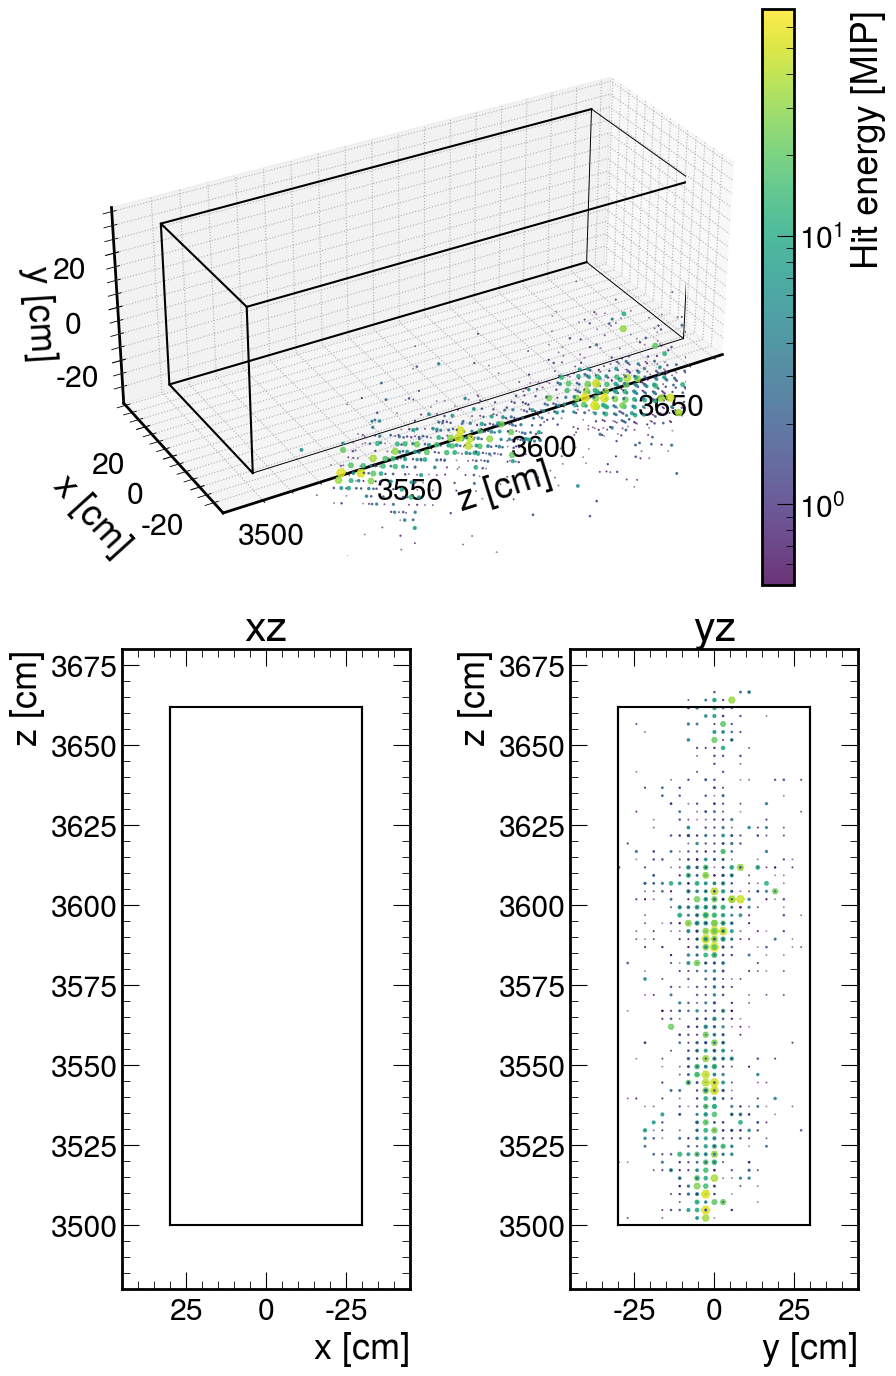

In [69]:
plots3d("cache/staggered_h3_zdc/zdc_sim_neutron_100GeV_theta_deg.edm4hep.root", "",  "../images/zdc_shower.pdf")

[[11, 2212, 2112], [11, 2212, 2112], [11, ... [11, 2212, 2112], [11, 2212, 2112]]


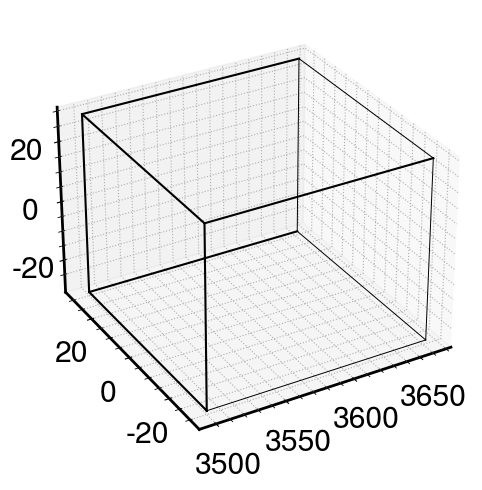

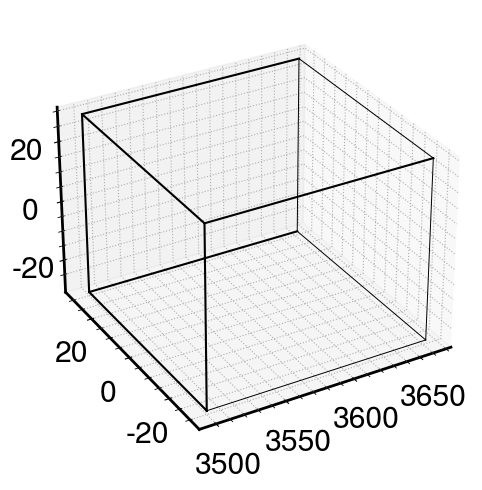

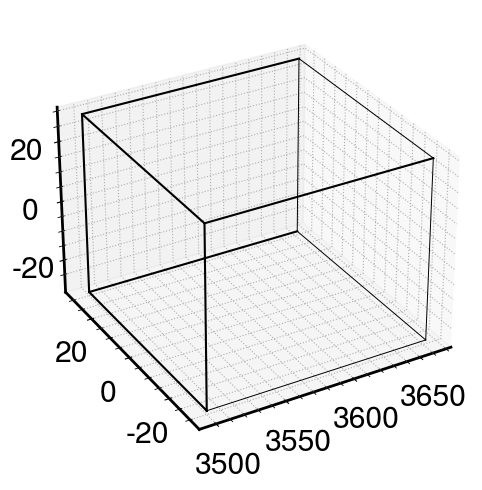

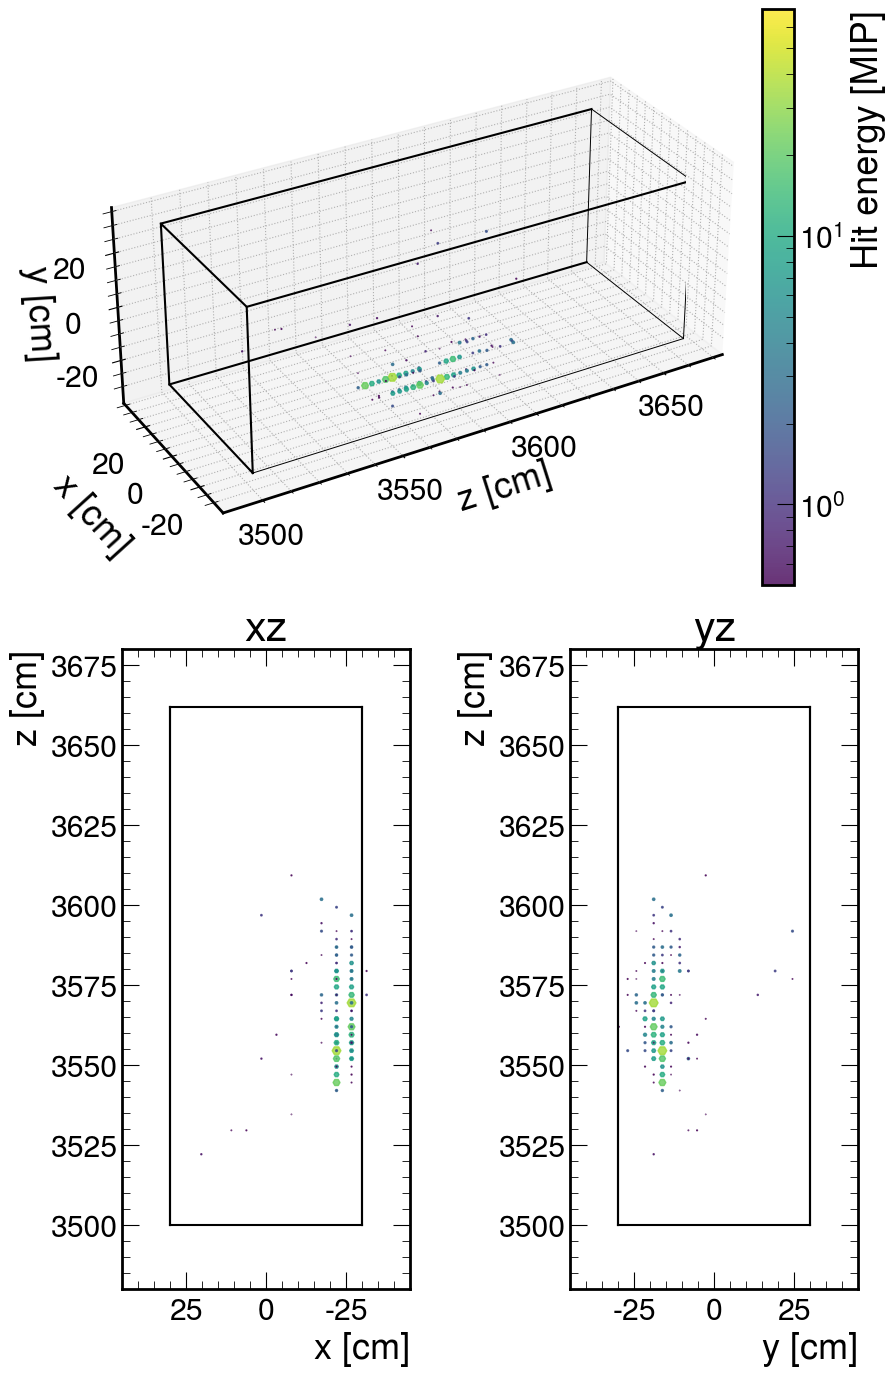

In [73]:
plots3d("zdc_sim_neutron_30GeV_theta_deg.edm4hep.root", "", None)